<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/Notebook_Profile_Empleados_test_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar librerías

In [ ]:
#!pip install pydantic-settings
#!pip install pandas-profiling
#!pip install ydata-profiling

In [3]:
#importamos librerias
import pandas as pd
from datetime import datetime
from ydata_profiling import ProfileReport

In [4]:
df_base = pd.read_excel('/content/Base Proyecto.xlsx')

In [5]:
display(df_base.head())

Cuenta  Orden de Trabajo         Producto Producto Venta Estrato  \
0   583693         292188193         45 MEGAS              @       3   
1   583693         292188193  ARREND EQUIP UV              @       3   
2  1389462         292008098  ARREND EQUIP UV              @       4   
3  1540502         292203866  ARREND EQUIP UV              @       4   
4  2331254         292189005         50 MEGAS              @       4   

            Nombre Asesor  Año  Mes  Día Tipo de Venta  ...  \
0  HERRERA  LINA FERNANDA   24    4    1    ..........  ...   
1  HERRERA  LINA FERNANDA   24    4    1    ..........  ...   
2  MORALES DIECELIS ADRIA   24    4    1    ..........  ...   
3  MUNOZ TENJO JEFFER ARM   24    4    1    OUTBOUND    ...   
4  MOTA VEGA JENNY CAROLI   24    4    1    INBOUND     ...   

                 Área           División Población         Política  \
0  4.4 BOGOTA ORIENTE  R4 CENTRO ORIENTE    BOGOTA         45 MEGAS   
1  4.4 BOGOTA ORIENTE  R4 CENTRO ORIENTE    BOGOTA  ARREND EQUIP UV   
2    4.1 BOGOTA NORTE  R4 CENTRO ORIENTE  GIRARDOT  ARREND EQUIP UV   
3    4.1 BOGOTA NORTE  R4 CENTRO ORIENTE  GIRARDOT  ARREND EQUIP UV   
4    4.1 BOGOTA NORTE  R4 CENTRO ORIENTE    BOGOTA         50 MEGAS   

        Venta   Servicio Renta Anterior Total  Renta Nueva Total  \
0   DIGITADAS    UPGRADE             111965.0           127964.0   
1   DIGITADAS  ADICIONAL             111965.0           127964.0   
2  INSTALADAS  ADICIONAL             119899.0           125899.0   
3   DIGITADAS  ADICIONAL             127400.0           133400.0   
4   DIGITADAS    UPGRADE             130900.0           133900.0   

   Diferencia de rentas                           SUPERVISOR  
0               15999.0            ERICK DANIEL BARROS PARRA  
1               15999.0            ERICK DANIEL BARROS PARRA  
2                6000.0  JEITSUDYS LINDSAY BARROS  VELASQUEZ  
3                6000.0       LUIS ALBERTO AVELLANEDA OLARTE  
4                3000.0  JEITSUDYS LINDSAY BARROS  VELASQUEZ  

[5 rows x 21 columns]

In [11]:
# prompt: crea una consulta de los asesores con sus supervisores

# Assuming 'Asesor' and 'Supervisor' are column names in your dataframe
consulta_asesores = df_base[['Nombre Asesor', 'SUPERVISOR']]
display(consulta_asesores)


Nombre Asesor                           SUPERVISOR
0     HERRERA  LINA FERNANDA            ERICK DANIEL BARROS PARRA
1     HERRERA  LINA FERNANDA            ERICK DANIEL BARROS PARRA
2     MORALES DIECELIS ADRIA  JEITSUDYS LINDSAY BARROS  VELASQUEZ
3     MUNOZ TENJO JEFFER ARM       LUIS ALBERTO AVELLANEDA OLARTE
4     MOTA VEGA JENNY CAROLI  JEITSUDYS LINDSAY BARROS  VELASQUEZ
...                      ...                                  ...
6835  FERNANDEZ MONTALVO EDI       LUIS ALBERTO AVELLANEDA OLARTE
6836  RODRIGUEZ GAMBOA GIOVA          CARLOS ADOLFO CORREA SIERRA
6837  BEDOYA MOLINA PAULA AN  JEITSUDYS LINDSAY BARROS  VELASQUEZ
6838  BEDOYA MOLINA PAULA AN  JEITSUDYS LINDSAY BARROS  VELASQUEZ
6839  BEDOYA MOLINA PAULA AN  JEITSUDYS LINDSAY BARROS  VELASQUEZ

[6840 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
consulta_asesores.groupby('SUPERVISOR').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

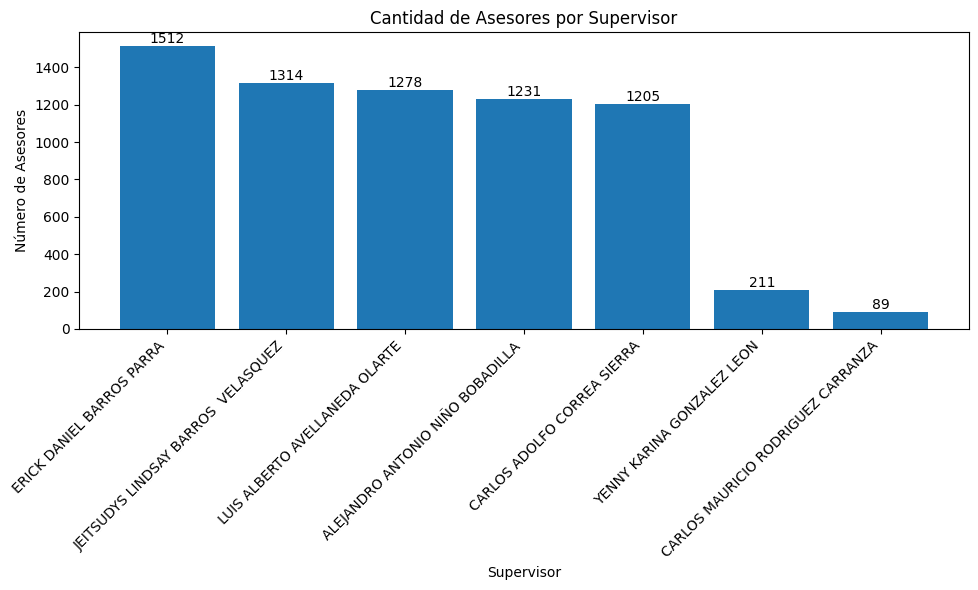

In [14]:
# prompt: cuenta la cantidad de asesores por supervisor y grafica de mayor a menor con etiquetas de valor

import matplotlib.pyplot as plt

# Cuenta la cantidad de asesores por supervisor
asesores_por_supervisor = consulta_asesores.groupby('SUPERVISOR')['Nombre Asesor'].count().sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(asesores_por_supervisor.index, asesores_por_supervisor.values)

# Agrega etiquetas de valor a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Supervisor')
plt.ylabel('Número de Asesores')
plt.title('Cantidad de Asesores por Supervisor')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()


In [ ]:
# Datos+Empleados.xlsx tiene varias hojas, necesito leerlas y crear tres dataframes y luego relacionarlos
df_empleados  = pd.read_excel('Datos+Empleados.xlsx', sheet_name='Tabla Empleados')
df_evaluacion = pd.read_excel('Datos+Empleados.xlsx', sheet_name='Tabla Evaluacion')
df_sueldos    = pd.read_excel('Datos+Empleados.xlsx', sheet_name='Tabla Sueldo')

# Relaciona los dataframes
df_merged = pd.merge(df_empleados, df_evaluacion, left_on='ID Empleado', right_on='ID Empleado')
df_merged = pd.merge(df_merged, df_sueldos, left_on='ID Empleado', right_on='ID Empleado')


In [ ]:
df_merged.head()

ID Empleado    Nombre Empleado                         Estado Nacimiento  \
0   1102024149     Spirea, Kelley     California, Estados Unidos 1980-09-28   
1   1001109612    Darson, Jene'ya     California, Estados Unidos 1983-05-10   
2   1000974650     Stanley, David          Texas, Estados Unidos 1975-12-16   
3   1206043417        Quinn, Sean  Massachusetts, Estados Unidos 1969-06-10   
4   1307060188  Boutwell, Bonalyn     California, Estados Unidos 1972-04-02   

   Género   Departamento           Posición     Nombre Jefe  Evaluación  \
0  Female  Admin Offices  Administrative II    Elijiah Gray        7.86   
1  Female  Admin Offices  Administrative II    Elijiah Gray        9.77   
2    Male  Admin Offices            Manager  Debra Houlihan        7.86   
3    Male  Admin Offices            Manager      Janet King        7.30   
4  Female  Admin Offices            Manager    Elijiah Gray        9.14   

   Sueldo  
0   64100  
1   63000  
2   90000  
3   99000  
4   63100

In [ ]:
# calcula la edad de los empleados a partir de la fecha de nacimiento
def calculate_age(born):
  today = datetime.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_merged['Edad'] = df_merged['Nacimiento'].apply(calculate_age)
df_merged.head()

ID Empleado    Nombre Empleado                         Estado Nacimiento  \
0   1102024149     Spirea, Kelley     California, Estados Unidos 1980-09-28   
1   1001109612    Darson, Jene'ya     California, Estados Unidos 1983-05-10   
2   1000974650     Stanley, David          Texas, Estados Unidos 1975-12-16   
3   1206043417        Quinn, Sean  Massachusetts, Estados Unidos 1969-06-10   
4   1307060188  Boutwell, Bonalyn     California, Estados Unidos 1972-04-02   

   Género   Departamento           Posición     Nombre Jefe  Evaluación  \
0  Female  Admin Offices  Administrative II    Elijiah Gray        7.86   
1  Female  Admin Offices  Administrative II    Elijiah Gray        9.77   
2    Male  Admin Offices            Manager  Debra Houlihan        7.86   
3    Male  Admin Offices            Manager      Janet King        7.30   
4  Female  Admin Offices            Manager    Elijiah Gray        9.14   

   Sueldo  Edad  
0   64100    43  
1   63000    41  
2   90000    48  
3   99000    55  
4   63100    52

In [6]:
prof = ProfileReport(df_base)

In [7]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof.to_file(output_file='output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]